In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Group 2 Report Notebook

## Project Description

- The objective of this project is to predict the forest cover type (the predominant kind of tree cover) using the cartographic variables given in the training/test datasets. You can find more about this project at [Forest Cover Type Prediction](https://www.kaggle.com/c/forest-cover-type-prediction).
- We are given raw unscaled data with both numerical and categorical variables.
- First we performed Exploratory Data Analysis in order to visualize the characteristics of our given variables. (See EDA Summary)
- We constructed various models to train our data - utilizing Optuna hyperparameter tuning to get parameters that maximize the model accuracies. (See Summary of Modeling Techniques Section)
- Using feature engineering techniques, we built new variables to help improve the accuracy of our models.
- Using the strategies above, we built our final model and generated forest cover type predictions for the test dataset.

## EDA Summary

The purpose of the EDA is to provide an overview of how python visualization tools can be used to understand the complex and large dataset. EDA is the first step in this workflow where the decision-making process is initiated for the feature selection. Some valuable insights can be obtained by looking at the distribution of the target, relationship to the target and link between the features. A more detailed notebook for the project is provided here: [[G2] ForestCoverType_EDA Notebook v2](https://www.kaggle.com/mariannejoyleano/g2-forestcovertype-eda-notebook-v2#Feature-Visualization)

- Not including the ID column, the training dataset has 55 columns and 15,120 rows (including the target variable column)
    - 10 numeric and 44 categorical variables
    - 7 different forest cover types (target variable)
        1. Spruce/Fir
        2. Lodgepole Pine
        3. Ponderosa Pine
        4. Cottonwood/Willow
        5. Aspen
        6. Douglas-fir
        7. Krummholz

### Visualize Numerical Variables
- Using histograms, we can visualize the spread and values of the 10 numeric variables.
- The `Slope`, `Vertical Distance to Hydrology`, and `Horizontal Distance to Hydrology`, `Roadways and Firepoints` are all skewed right.
- `Hillshade 9am, Noon and 3pm` are all skewed left.

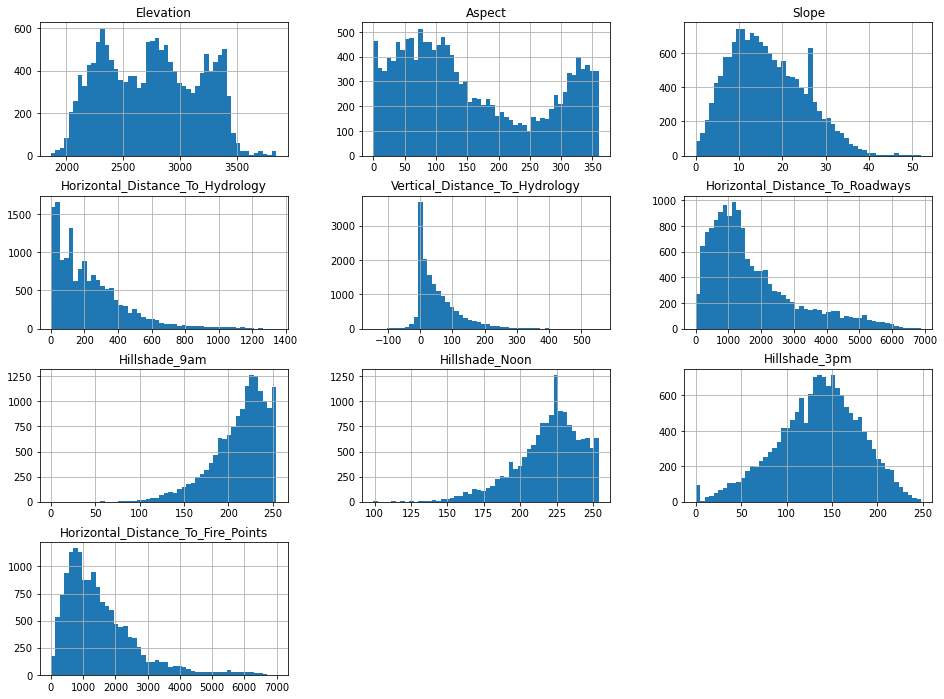

In [2]:
train = pd.read_csv('../input/forest-cover-type-prediction/train.csv')
train = train.iloc[:,1:]
train.iloc[:,:10].hist(figsize=(16,12), bins=50)
plt.show()

### Visualize Categorical Variables
- The plots below show the number of observations of the different Wilderness Areas and Soil Types.
- Wilderness Areas 3 and 4 have the most presence.
- Wilderness Area 2 has the least amount of observations.
- The most observations are seen having Soil Type 10 followed by Soil Type 29.
- The Soil Types with the least amount of observations are Soil Type 7 and 15.

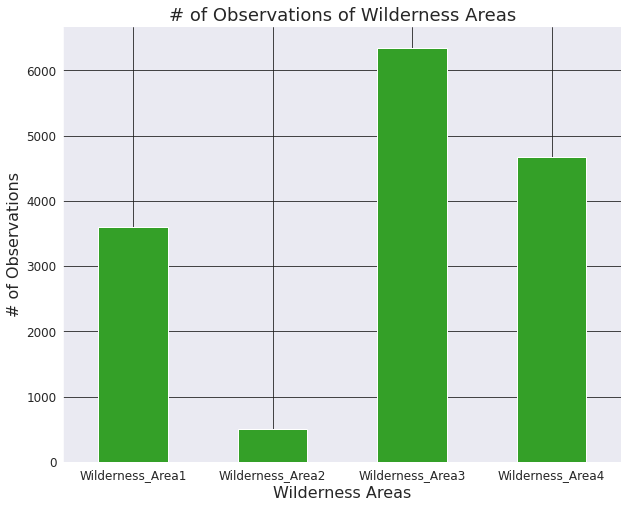

In [3]:
cat_features = train.iloc[:, 10:-1]
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]

sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

palette = sns.color_palette(flatui)

wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

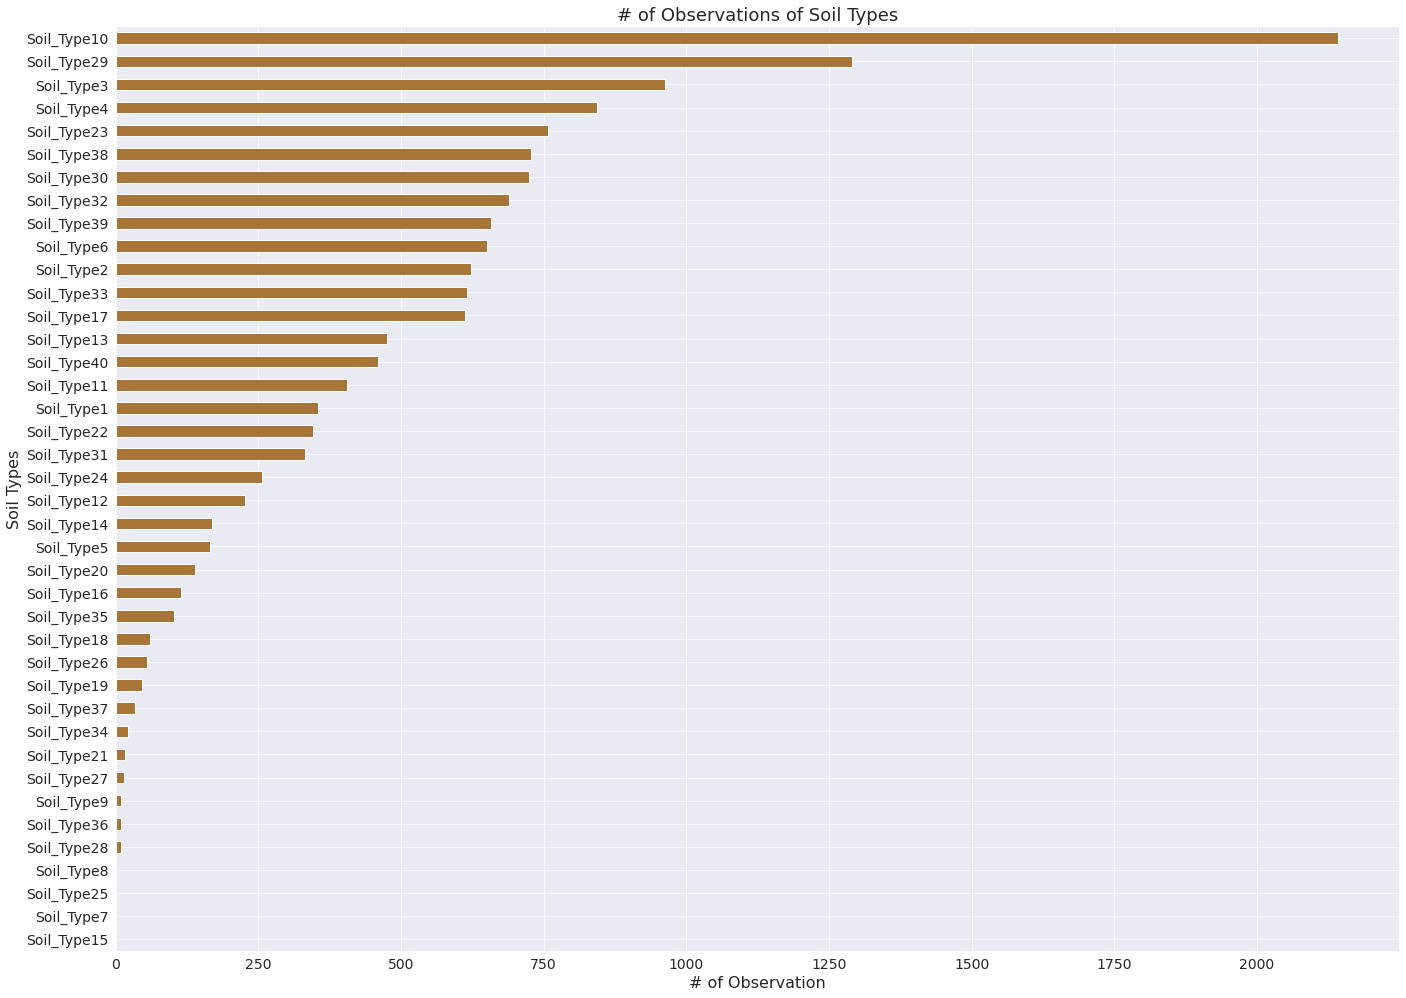

In [4]:
# plot bg
sns.set_style("darkgrid", {'grid_color': '.1'})

# sum soil data, pass it as a series
soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

# plot bar
soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('# of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

### Feature Correlation     
With the heatmap excluding binary variables this help us visualize the correlations of the features. We were also able to provide scatterplots for four pairs of features that had a **positive correlation greater then 0.5**. These are one of the many visualizations that helped us understand the characteristics of the features for future feature engineering and model selection.

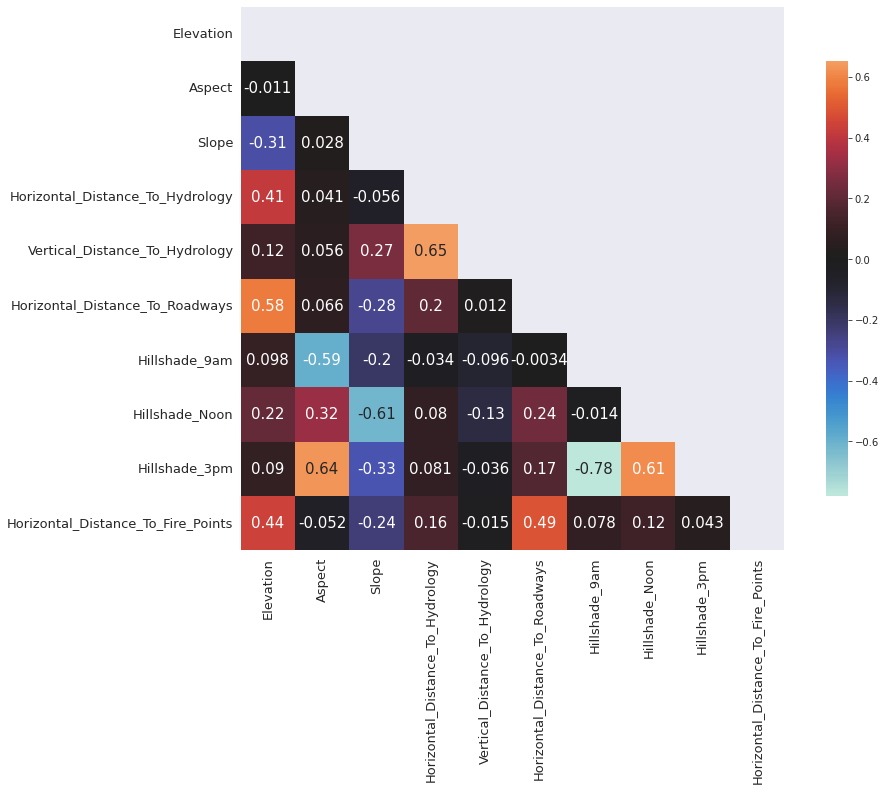

In [5]:
num_features = train.iloc[:,:10]
plt.subplots(figsize=(15,10))
num_features_corr = num_features.corr()

mask = np.zeros_like(num_features_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

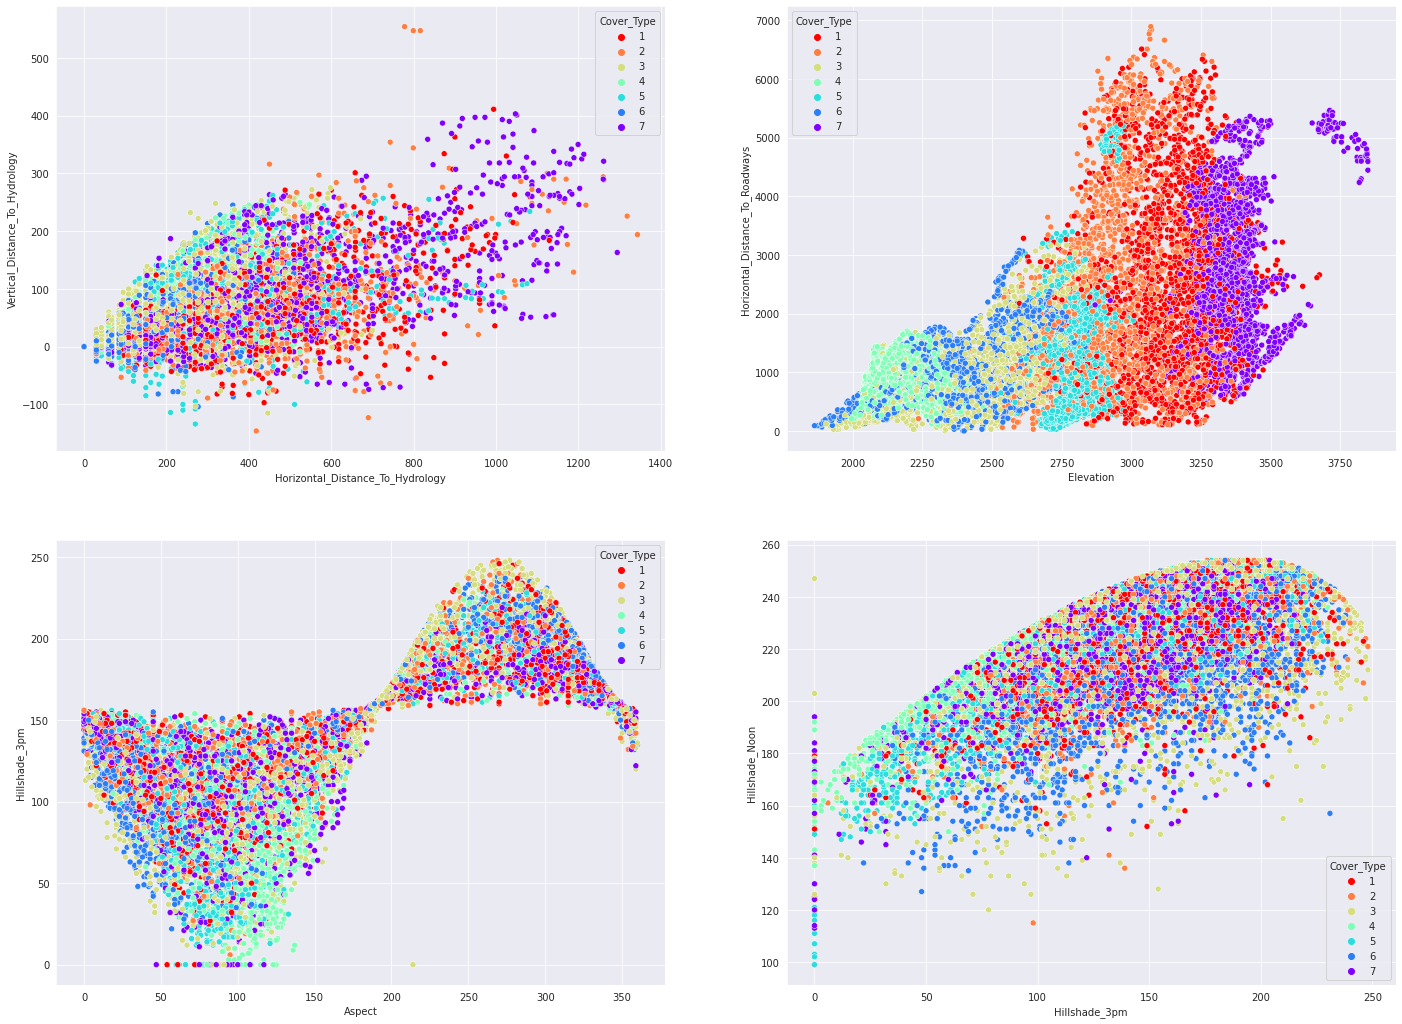

In [6]:
fig, ax = plt.subplots(2,2, figsize=(24,18))

sns.scatterplot(data=train, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=train, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=train, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=train, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

## Summary of Challenges

### EDA Challenges
- This project consists of a lot of data and can have countless of patterns and details to look at. 
- The training data was not a simple random sample of the entire dataset, but a stratified sample of the seven forest cover type classes which may not represent the final predictions well.
- Creating a "story" to be easily incorporated into the corresponding notebooks such as Feature Engineering, Models, etc.
- Manipulating the `Wilderness_Area` and `Soil_Type` (one-hot encoded variables) to visualize its distribution compared to `Cover_Type`.

### Feature Engineering Challenges
- Adding new variables during feature engineering often produced lower accuracy.
- Automated feature engineering using entities and transformations amongst existing columns from a single dataset created many new columns that did not positively contribute to the model's accuracy - even after feature selection.
- Testing the new features produced was very time consuming, even with the GPU accelerator.
- After playing around with several different sets of new features, we found that only including manually created new features yielded the highest results.

### Modeling Challenges

- Ensemble and stacking methods initially resulted in models yielding higher accuracy on the test set, but as we added features and refined the parameters for each individual model, an individual model yielded a better score on the test set. 
- Performing hyperparameter tuning and training for several of the models was computationally expensive. While we were able to enable GPU acceleration for the XGBoost model, activating the GPU accelerator seemed to increase the tuning and training for the other models in the training notebook. 
- Optuna worked to reduce the time to process hyperparameter trials, but some of the hyperparameters identified through this method yielded weaker models than the hyperparameters identified through GridSearchCV. A balance between the two was needed. 

## Summary of Modeling Techniques

We used several modeling techniques for this project. We began by training simple, standard models and applying the predictions to the test set. This resulted in models with only 50%-60% accuracy, necessitating more complex methods. The following process was used to develop the final model:
- Scaling the training data to perform PCA and identify the most important features (see the Feature_Engineering Notebook for more detail)
- Preprocessing the training data to add in new features
- Performing GridSearchCV and using the Optuna approach (see the ModelParams Notebook for more detail) for identifying optimal parameters for the following models with corresponding training set accuracy scores:
    - Logistic Regression (.7126)
    - Decision Tree (.9808)
    - Random Forest (1.0)
    - Extra Tree Classifier (1.0)
    - Gradient Boosting Classifier (1.0)
    - Extreme Gradient Boosting Classifier (using GPU acceleration; 1.0)
    - AdaBoost Classifier (.5123)
    - Light Gradient Boosting Classifier (.8923)
    - Ensemble/Voting Classifiers (assorted combinations of the above models; 1.0)
- Saving and exporting the preprocessor/scaler and each each version of the model with the highest accuracy on the training set and highest cross validation score (see the Training notebook for more detail).
- Calculating each model's predictions for the test set and submitting to determine accuracy on the test set:
    - Logistic Regression (.6020)
    - Decision Tree (.7102)
    - Random Forest (.7465)
    - Extra Tree Classifier (.7962)
    - Gradient Boosting Classifier (.7905)
    - Extreme Gradient Boosting Classifier (using GPU acceleration; .7803)
    - AdaBoost Classifier (.1583)
    - Light Gradient Boosting Classifier (.6891)
    - Ensemble/Voting Classifiers (assorted combinations of the above models; .7952)

## Summary of Final Results

The model with the highest accuracy on the out of sample (test set) data was selected as our final model. It should be noted that the model with the highest accuracy according to 10-fold cross validation was not the most accurate model on the out of sample data (although it was close). The best model was the Extra Tree Classifier with an accuracy of .7962 on the test set. The Extra Trees model outperformed our Ensemble model (.7952), which had been our best model for several weeks. See the Submission Notebook and FinalModelEvaluation Notebook for additional detail. 

## Links
- [**[G2] ForestCoverType_EDA Notebook**](https://www.kaggle.com/mariannejoyleano/g2-forestcovertype-eda-notebook-v2)
- [**[G2] ForestCoverType_Feature_Engineering Notebook**](https://www.kaggle.com/jamiesperos/g2-forestcovertype-feature-engineering-notebook/)
- [**[G2] ForestCoverType_Training Notebook**](https://www.kaggle.com/emknowles/g2-forestcovertype-training-notebook/)
- [**[G2] ForestCoverType_ModelParams Notebook**](https://www.kaggle.com/emknowles/g2-forestcovertype-modelparams-notebook/)
- [**[G2] ForestCoverType_FinalModelEvaluation Notebook**](https://www.kaggle.com/emknowles/g2-forestcovertype-finalmodelevaluation-notebook)
- [**[G2] ForestCoverType_Submission Notebook**](https://www.kaggle.com/emknowles/g2-forest-cover-type-submission-v05)
